Necessary import


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd



In [2]:
# Step 1: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
# Step 2: Normalize pixel values (0–255) to (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0



In [4]:
# Step 3: Reshape images from (28, 28) to (28, 28, 1)
# CNN expects a 4D input: (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)



In [5]:
# Step 4: One-hot encode the labels (e.g., 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [6]:
# Step 5: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 output neurons for digits 0–9
])

/Users/elena/Documents/CNN/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model
• adam optimizer: Efficient for training.
• categorical_crossentropy: Appropriate for multi-class classification.
• accuracy: Evaluation metric.

In [7]:
# Step 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8379 - loss: 0.5150 - val_accuracy: 0.9820 - val_loss: 0.0545
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9742 - loss: 0.0880 - val_accuracy: 0.9887 - val_loss: 0.0341
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9813 - loss: 0.0616 - val_accuracy: 0.9891 - val_loss: 0.0304
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9855 - loss: 0.0517 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9888 - loss: 0.0373 - val_accuracy: 0.9923 - val_loss: 0.0244


In [9]:
# Step 8: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0296
Test accuracy: 0.9922999739646912


In [22]:
import cv2
import numpy as np

In [51]:
img = cv2.imread('image2.jpeg', cv2.IMREAD_GRAYSCALE)


In [52]:
import os
print(os.path.exists('image2.jpeg'))  # Should print True


True


In [48]:
if img is None:
    print("❌ Error: Image not found or failed to load.")
else:
    print("✅ Image loaded successfully. Shape:", img.shape)


✅ Image loaded successfully. Shape: (599, 602)


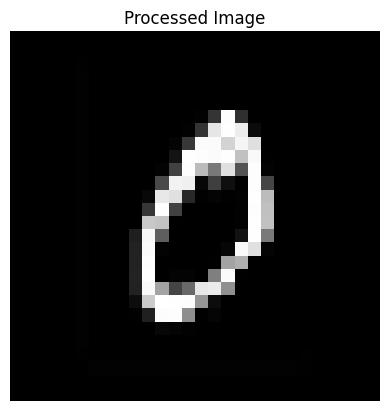

In [53]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image2.jpeg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("❌ Image loading failed. Check the path.")
else:
    # Step 2: Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Step 3: Invert colors
    img = 255 - img

    # Step 4: Normalize
    img = img / 255.0

    # Step 5: Reshape
    img = img.reshape(1, 28, 28, 1).astype("float32")

    # Display
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title("Processed Image")
    plt.axis('off')
    plt.show()



In [54]:
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted digit: 0
